In [ ]:
# In this iteration I used a linear model and adjusted the number of bins in the Classification and Application_Types
# There was no gain in accuracy

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

In [2]:
#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("data/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(['EIN', 'NAME'], axis=1, inplace=True)

In [4]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [5]:
AffilCounts = application_df.AFFILIATION.value_counts()
AffilCounts

Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: AFFILIATION, dtype: int64

In [6]:
# Determine which values to replace if counts are less than ...?
replace_affil = list(AffilCounts[AffilCounts < 1000].index)

# Replace in dataframe
for inc in replace_affil:
    application_df.AFFILIATION = application_df.AFFILIATION.replace(inc,"Other")
    
# Check to make sure binning was successful
application_df.AFFILIATION.value_counts()

Independent         18480
CompanySponsored    15705
Other                 114
Name: AFFILIATION, dtype: int64

In [7]:
IncAmtCounts = application_df.INCOME_AMT.value_counts()
IncAmtCounts

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64

<AxesSubplot:ylabel='Density'>

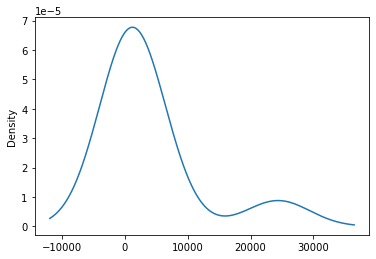

In [8]:
# Visualize the value counts of APPLICATION_TYPE
IncAmtCounts.plot.density()

In [9]:
# Determine which values to replace if counts are less than ...?
replace_inc = list(IncAmtCounts[IncAmtCounts < 1000].index)

# Replace in dataframe
for inc in replace_inc:
    application_df.INCOME_AMT = application_df.INCOME_AMT.replace(inc,"Other")
    
# Check to make sure binning was successful
application_df.INCOME_AMT.value_counts()

0                24388
25000-99999       3747
100000-499999     3374
Other             2790
Name: INCOME_AMT, dtype: int64

In [10]:
# Look at APPLICATION_TYPE value counts for binning
AppTypeCounts = application_df.APPLICATION_TYPE.value_counts()
AppTypeCounts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

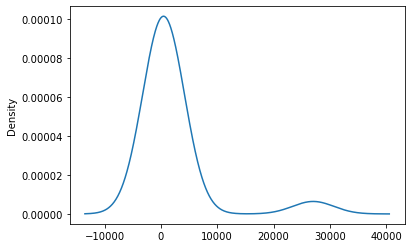

In [11]:
# Visualize the value counts of APPLICATION_TYPE
AppTypeCounts.plot.density()

In [31]:
# Determine which values to replace if counts are less than ...?
replace_application = list(AppTypeCounts[AppTypeCounts < 5000].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
Other     7262
Name: APPLICATION_TYPE, dtype: int64

In [32]:
# Look at CLASSIFICATION value counts for binning
ClassificationCounts = application_df.CLASSIFICATION.value_counts()
ClassificationCounts

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

<AxesSubplot:ylabel='Density'>

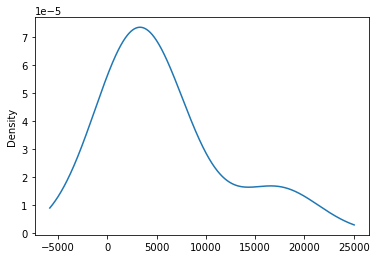

In [33]:
# Visualize the value counts of CLASSIFICATION
ClassificationCounts.plot.density()

In [34]:
# Determine which values to replace if counts are less than ..?
replace_class = list(ClassificationCounts[ClassificationCounts < 4000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
Other     6062
C1200     4837
Name: CLASSIFICATION, dtype: int64

In [35]:
# Generate our categorical variable lists
CatVarList = ['APPLICATION_TYPE', 'CLASSIFICATION', 'AFFILIATION', 'INCOME_AMT']

In [36]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = application_df[['ASK_AMT', 'IS_SUCCESSFUL']]
for catVar in CatVarList:
    catvar_df = pd.DataFrame(enc.fit_transform(application_df[catVar].values.reshape(-1,1)))
    # Add the encoded variable names to the dataframe
    catvar_df.columns = enc.get_feature_names([catVar])
    encode_df = pd.concat([encode_df, catvar_df], axis=1)
encode_df.head()

,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T3,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C2000,CLASSIFICATION_Other,AFFILIATION_CompanySponsored,AFFILIATION_Independent,AFFILIATION_Other,INCOME_AMT_0,INCOME_AMT_100000-499999,INCOME_AMT_25000-99999,INCOME_AMT_Other
0,5000,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,108590,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,5000,0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,6692,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,142590,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [37]:
# Split our preprocessed data into our features and target arrays
y = encode_df["IS_SUCCESSFUL"].values
X = encode_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [38]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [121]:
Deliverable 2: Compile, Train and Evaluate the Model

SyntaxError: invalid syntax (<ipython-input-121-b81203ed78f2>, line 1)

In [40]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  15
hidden_nodes_layer2 = 10
hidden_nodes_layer3 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 15)                225       
_________________________________________________________________
dense_12 (Dense)             (None, 10)                160       
_________________________________________________________________
dense_13 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 6         
Total params: 446
Trainable params: 446
Non-trainable params: 0
_________________________________________________________________


In [41]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [42]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [43]:
# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

In [44]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=20,callbacks=[cp_callback])

Epoch 1/20
  1/804 [..............................] - ETA: 4:48 - loss: 0.7108 - accuracy: 0.4688
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
 21/804 [..............................] - ETA: 2s - loss: 0.6919 - accuracy: 0.5179  
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
 41/804 [>.............................] - ETA: 2s - loss: 0.6922 - accuracy: 0.5046
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
 62/804 [=>..........................


Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
502/804 [=================>............] - ETA: 0s - loss: 0.6378 - accuracy: 0.6683
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
521/804 [==================>...........] - ETA: 0s - loss: 0.6363 - accuracy: 0.6696
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
541/804 [===================>..........] - ETA: 0s - loss: 0.6359 - accuracy: 0.6697
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01

182/804 [=====>........................] - ETA: 2s - loss: 0.6065 - accuracy: 0.6829
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
197/804 [======>.......................] - ETA: 2s - loss: 0.6053 - accuracy: 0.6854
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
212/804 [======>.......................] - ETA: 1s - loss: 0.6040 - accuracy: 0.6874
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
227/804 [=======>......................] - ETA: 1s - loss: 0.6061 - accuracy: 0.6871
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model


Epoch 00002: saving model to checkpoints/weights.02.hdf5
676/804 [========================>.....] - ETA: 0s - loss: 0.6043 - accuracy: 0.6905
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
690/804 [========================>.....] - ETA: 0s - loss: 0.6047 - accuracy: 0.6900
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 0.6044 - accuracy: 0.6905
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
722/804 [=========================>....] - ETA: 0s - loss: 0.6039 - accuracy: 0.6910
Epoch 00002: saving model

340/804 [===========>..................] - ETA: 1s - loss: 0.6013 - accuracy: 0.6933
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
358/804 [============>.................] - ETA: 1s - loss: 0.6003 - accuracy: 0.6946
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
373/804 [============>.................] - ETA: 1s - loss: 0.6006 - accuracy: 0.6939
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
390/804 [=============>................] - ETA: 1s - loss: 0.6011 - accuracy: 0.6936
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model


Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
 17/804 [..............................] - ETA: 2s - loss: 0.6123 - accuracy: 0.6746
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
 29/804 [>.............................] - ETA: 2s - loss: 0.6173 - accuracy: 0.6606
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
 45/804 [>.............................] - ETA: 2s - loss: 0.6120 - accuracy: 0.6715
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
 61/804 [=>............................] - ETA: 2s - loss: 0.6048 - accuracy: 0.6803
Epoch 00004: saving model

488/804 [=================>............] - ETA: 1s - loss: 0.5991 - accuracy: 0.6969
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
504/804 [=================>............] - ETA: 1s - loss: 0.6001 - accuracy: 0.6954
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
519/804 [==================>...........] - ETA: 0s - loss: 0.5999 - accuracy: 0.6951
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
534/804 [==================>...........] - ETA: 0s - loss: 0.6003 - accuracy: 0.6945
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model

150/804 [====>.........................] - ETA: 2s - loss: 0.6005 - accuracy: 0.6913
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
165/804 [=====>........................] - ETA: 2s - loss: 0.6006 - accuracy: 0.6903
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
180/804 [=====>........................] - ETA: 2s - loss: 0.5995 - accuracy: 0.6899
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
200/804 [======>.......................] - ETA: 2s - loss: 0.6009 - accuracy: 0.6891
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model


Epoch 00005: saving model to checkpoints/weights.05.hdf5
648/804 [=======================>......] - ETA: 0s - loss: 0.6021 - accuracy: 0.6915
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
665/804 [=======================>......] - ETA: 0s - loss: 0.6017 - accuracy: 0.6915
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
685/804 [========================>.....] - ETA: 0s - loss: 0.6012 - accuracy: 0.6924
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05


Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
341/804 [===========>..................] - ETA: 1s - loss: 0.6036 - accuracy: 0.6919
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
359/804 [============>.................] - ETA: 1s - loss: 0.6019 - accuracy: 0.6938
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
376/804 [=============>................] - ETA: 1s - loss: 0.6030 - accuracy: 0.6928
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06

 37/804 [>.............................] - ETA: 2s - loss: 0.5919 - accuracy: 0.7027
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
 52/804 [>.............................] - ETA: 2s - loss: 0.5969 - accuracy: 0.6953
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
 72/804 [=>............................] - ETA: 2s - loss: 0.5994 - accuracy: 0.6936
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
 88/804 [==>...........................] - ETA: 2s - loss: 0.6012 - accuracy: 0.6921
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model


Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
547/804 [===================>..........] - ETA: 0s - loss: 0.5994 - accuracy: 0.6954
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
562/804 [===================>..........] - ETA: 0s - loss: 0.6001 - accuracy: 0.6941
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
578/804 [====================>.........] - ETA: 0s - loss: 0.6000 - accuracy: 0.6942
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
592/804 [=====================>........] - ETA: 0s - loss: 0.6003 - accuracy: 0.6939
Epoch 00007: saving model


Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
233/804 [=======>......................] - ETA: 1s - loss: 0.6001 - accuracy: 0.6933
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
253/804 [========>.....................] - ETA: 1s - loss: 0.6004 - accuracy: 0.6931
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
273/804 [=========>....................] - ETA: 1s - loss: 0.5988 - accuracy: 0.6944
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08

Epoch 00008: saving model to checkpoints/weights.08.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.5999 - accuracy: 0.6951
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
758/804 [===========================>..] - ETA: 0s - loss: 0.5998 - accuracy: 0.6951
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.6002 - accuracy: 0.6949
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.

427/804 [==============>...............] - ETA: 1s - loss: 0.5993 - accuracy: 0.6958
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
444/804 [===============>..............] - ETA: 1s - loss: 0.5986 - accuracy: 0.6964
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
464/804 [================>.............] - ETA: 1s - loss: 0.5989 - accuracy: 0.6956
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
484/804 [=================>............] - ETA: 0s -


Epoch 00010: saving model to checkpoints/weights.10.hdf5
130/804 [===>..........................] - ETA: 2s - loss: 0.6102 - accuracy: 0.6800
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
149/804 [====>.........................] - ETA: 1s - loss: 0.6107 - accuracy: 0.6810
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
165/804 [=====>........................] - ETA: 1s - loss: 0.6083 - accuracy: 0.6831
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
185/804 [=====>........................] - ETA: 1s -


Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
640/804 [======================>.......] - ETA: 0s - loss: 0.5986 - accuracy: 0.6958
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
660/804 [=======================>......] - ETA: 0s - loss: 0.5979 - accuracy: 0.6965
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
680/804 [========================>.....] - ETA: 0s - loss: 0.5979 - accuracy: 0.6963
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10


Epoch 00011: saving model to checkpoints/weights.11.hdf5
336/804 [===========>..................] - ETA: 1s - loss: 0.5939 - accuracy: 0.7032
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
355/804 [============>.................] - ETA: 1s - loss: 0.5969 - accuracy: 0.7006
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
371/804 [============>.................] - ETA: 1s - loss: 0.5977 - accuracy: 0.6995
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
390/804 [=============>................] - ETA: 1s - loss: 0.5984 - accuracy: 0.6982
Epoch 00011: saving model


Epoch 00012: saving model to checkpoints/weights.12.hdf5
 36/804 [>.............................] - ETA: 2s - loss: 0.5999 - accuracy: 0.6901
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
 52/804 [>.............................] - ETA: 2s - loss: 0.6044 - accuracy: 0.6869
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
 72/804 [=>............................] - ETA: 2s - loss: 0.5998 - accuracy: 0.6953
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12


Epoch 00012: saving model to checkpoints/weights.12.hdf5
537/804 [===================>..........] - ETA: 0s - loss: 0.5991 - accuracy: 0.6949
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
557/804 [===================>..........] - ETA: 0s - loss: 0.5989 - accuracy: 0.6947
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
577/804 [====================>.........] - ETA: 0s - loss: 0.5986 - accuracy: 0.6957
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12

228/804 [=======>......................] - ETA: 1s - loss: 0.6015 - accuracy: 0.6917
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
245/804 [========>.....................] - ETA: 1s - loss: 0.6018 - accuracy: 0.6917
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
263/804 [========>.....................] - ETA: 1s - loss: 0.6009 - accuracy: 0.6915
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
283/804 [=========>....................] - ETA: 1s - loss: 0.6021 - accuracy: 0.6907
Epoch 00013: saving model


Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
743/804 [==========================>...] - ETA: 0s - loss: 0.5994 - accuracy: 0.6959
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
763/804 [===========================>..] - ETA: 0s - loss: 0.5987 - accuracy: 0.6964
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
783/804 [============================>.] - ETA: 0s - loss: 0.5990 - accuracy: 0.6959
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13


Epoch 00014: saving model to checkpoints/weights.14.hdf5
442/804 [===============>..............] - ETA: 1s - loss: 0.5976 - accuracy: 0.6974
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
459/804 [================>.............] - ETA: 1s - loss: 0.5965 - accuracy: 0.6989
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
476/804 [================>.............] - ETA: 0s - loss: 0.5972 - accuracy: 0.6984
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
494/804 [=================>............] - ETA: 0s -

135/804 [====>.........................] - ETA: 1s - loss: 0.5933 - accuracy: 0.6988
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
155/804 [====>.........................] - ETA: 1s - loss: 0.5977 - accuracy: 0.6933
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
174/804 [=====>........................] - ETA: 1s - loss: 0.5960 - accuracy: 0.6958
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
190/804 [======>.......................] - ETA: 1s - loss: 0.5972 - accuracy: 0.6947
Epoch 00015: saving model

645/804 [=======================>......] - ETA: 0s - loss: 0.5989 - accuracy: 0.6963
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
665/804 [=======================>......] - ETA: 0s - loss: 0.5982 - accuracy: 0.6968
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
685/804 [========================>.....] - ETA: 0s - loss: 0.5991 - accuracy: 0.6964
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
705/804 [=========================>....] - ETA: 0s -


Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
346/804 [===========>..................] - ETA: 1s - loss: 0.5983 - accuracy: 0.6953
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
366/804 [============>.................] - ETA: 1s - loss: 0.5983 - accuracy: 0.6954
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
384/804 [=============>................] - ETA: 1s - loss: 0.5981 - accuracy: 0.6959
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16


Epoch 00017: saving model to checkpoints/weights.17.hdf5
 37/804 [>.............................] - ETA: 2s - loss: 0.5863 - accuracy: 0.7103
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
 56/804 [=>............................] - ETA: 2s - loss: 0.5941 - accuracy: 0.7003
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
 72/804 [=>............................] - ETA: 2s - loss: 0.5910 - accuracy: 0.7070
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
 92/804 [==>...........................] - ETA: 2s -

537/804 [===================>..........] - ETA: 0s - loss: 0.5971 - accuracy: 0.6991
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
557/804 [===================>..........] - ETA: 0s - loss: 0.5972 - accuracy: 0.6989
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
577/804 [====================>.........] - ETA: 0s - loss: 0.5974 - accuracy: 0.6989
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
595/804 [=====================>........] - ETA: 0s - loss: 0.5972 - accuracy: 0.6987
Epoch 00017: saving model

228/804 [=======>......................] - ETA: 1s - loss: 0.5931 - accuracy: 0.7026
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
248/804 [========>.....................] - ETA: 1s - loss: 0.5940 - accuracy: 0.7017
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
268/804 [=========>....................] - ETA: 1s - loss: 0.5951 - accuracy: 0.7001
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
287/804 [=========>....................] - ETA: 1s - loss: 0.5968 - accuracy: 0.6981
Epoch 00018: saving model

743/804 [==========================>...] - ETA: 0s - loss: 0.5978 - accuracy: 0.6969
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
763/804 [===========================>..] - ETA: 0s - loss: 0.5982 - accuracy: 0.6967
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
783/804 [============================>.] - ETA: 0s - loss: 0.5989 - accuracy: 0.6960
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
804/804 [==============================] - 2s 3ms/st

440/804 [===============>..............] - ETA: 1s - loss: 0.5986 - accuracy: 0.6979
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
459/804 [================>.............] - ETA: 1s - loss: 0.5988 - accuracy: 0.6976
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
479/804 [================>.............] - ETA: 0s - loss: 0.5989 - accuracy: 0.6980
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
499/804 [=================>............] - ETA: 0s -


Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
140/804 [====>.........................] - ETA: 2s - loss: 0.5956 - accuracy: 0.6984
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
160/804 [====>.........................] - ETA: 1s - loss: 0.5955 - accuracy: 0.6986
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
180/804 [=====>........................] - ETA: 1s - loss: 0.5922 - accuracy: 0.7017
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20

630/804 [======================>.......] - ETA: 0s - loss: 0.5987 - accuracy: 0.6957
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
650/804 [=======================>......] - ETA: 0s - loss: 0.5990 - accuracy: 0.6955
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
670/804 [========================>.....] - ETA: 0s - loss: 0.5997 - accuracy: 0.6950
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
690/804 [========================>.....] - ETA: 0s -

In [45]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 9872.2529 - accuracy: 0.4708
Loss: 9872.2529296875, Accuracy: 0.4707871675491333


In [46]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharityOptimization3.h5")